<a href="https://colab.research.google.com/github/dataqueenpend/DS_From_Zero_To_Hero/blob/gh-pages/Supervised_Learning_with_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Supervised Learning with scikit-learn

from DataCamp course

modified notes from the course and solved exercises by me

##Classification

**The classification challenge**

> We have a set of labeled data and we want to build a classifier that takes unlabeled data as input and outputs a label.

First: choose the right type of the classifier. 

Second: take data which is already labeled. 

**k-Nearest Neighbors** *predicts the label of any data point by looking at the K, closest labeled data points and getting them to vote on what label the unlabeled point should have*

*k-Nearest Neighbors* - classification examples

 how do you classify a blue data point in the middle:

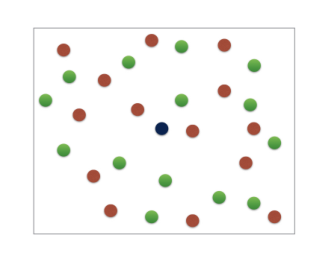

 * if k equals 3:

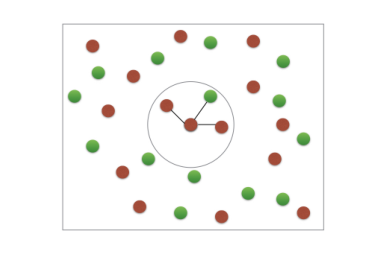
> as red
 * if k equals 5:

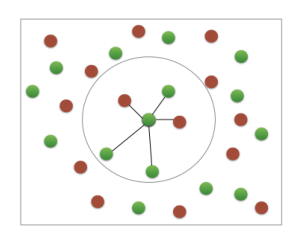

>as green.



**kNN on Iris dataset scatterplot**

Here we have 2d plot of the Iris dataset. It is visualized as 2d for the learning purposes, naturally it holds more than 2 dimensions. 
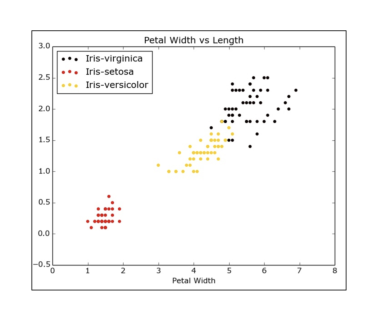
kNN creates a decision boundaries, visualized on the plot. 

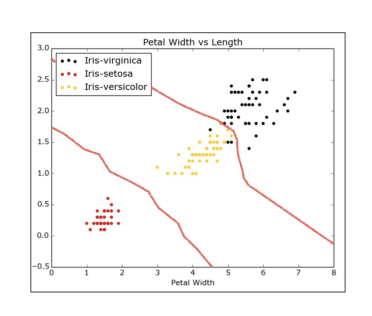
Any new data point within those boundries will be precidted according to it as  'setosa', 'virginica' or  'versicolor'.

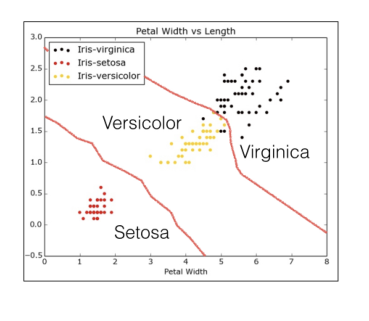

**Scikit-learn fit and predict**

*All machine learning models in scikit-learn are implemented as python classes.*
classes serve two purposes:
* they implement the algorithms for learning a model and predicting,
* storing all the information that is learned from the data. 

Training (fitting) a model to the data is performed with the method ```.fit()```. And the ```.predict()``` method is used to predict the label of an, unlabeled data point.

**Fit a model: step by step**

> The scikit-learn API *requires* firstly that you have **the data as a NumPy array or pandas DataFrame**. 

> It also *requires* that the features take on **continuous values**, such as the price of a house, as opposed to categories, such as 'male' or 'female'.

> It also *requires* that there are **no missing values** in the data.

>  *Requires* that the features are in an array where **each column is a feature** and **each row a different observation** or data point. 


* import KNeighborsClassifier from sklearn.neighbors.

```
from sklearn.neighbors import KNeighborsClassifier
```

* then instantiate our KNeighborsClassifier, set the number of neighbors equal to 6, and assign it to the variable knn

```
knn = KNeighborsClassifier(n_neighbors=6)
```
* fit this classifier to our training set, the labeled data - we apply the method fit to the classifier and pass it two arguments: the features as a NumPy array and the labels, or target, as a NumPy array.

```
knn.fit(iris['data'], iris['target'])
```
Returns the classifier itself and modifies it to fit it to the data. 
```
KNeighborsClassifier(algorithm='auto', leaf_size=30,
metric='minkowski',metric_params=None, n_jobs=1,
n_neighbors=6, p=2,weights='uniform')
```

Looking at the shape of iris data, we see that there are 150 observations of four features.

```
iris['data'].shape
```
```
(150, 4)
```

The target needs to be a single column with the same number of observations as the feature data.

```
iris['target'].shape
```

```
(150,)
```

In this case there are indeed also 150 labels. 

---
 We have fit our classifier, lets use it to predict on some unlabeled data!

**Predicting on unlabeled data**

 We have set of observations, X new.

```
X_new = np.array([[5.6, 2.8, 3.9, 1.1],
[5.7, 2.6, 3.8, 1.3],
[4.7, 3.2, 1.3, 0.2]])
```

We use the predict method on the classifier and pass it the data. 

```
prediction = knn.predict(X_new)
```

The API requires that we pass the data as a NumPy array with features in columns and observations in rows; checking the shape of X new, we see that it has three rows and four columns, that is, three observations and four features. 
```
X_new.shape
```
```
(3, 4)
```
Then we would expect calling knn.predict of X new to return a three-by-one array with a prediction for each observation or row in X new. And indeed it does! It predicts one, which corresponds to 'versicolor' for the first two observations and 0, which corresponds to 'setosa' for the third.

```
print('Prediction: {}’.format(prediction))
```
```
Prediction: [1 1 0]
```


**k-NN in practice - fitting**

Fit a k-Nearest Neighbors classifier to the voting dataset. 
> The features need to be in an array where each column is a feature and each row a different observation or data point - in this case, a Congressman's voting record. 

> The target needs to be a single column with the same number of observations as the feature data.

Create an instance of a k-NN classifier with 6 neighbors (by specifying the n_neighbors parameter) and then fit it to the data.


* Import KNeighborsClassifier from sklearn.neighbors.
* Create arrays X and y for the features and the target variable. Note the use of .drop() to drop the target variable 'party' from the feature array X as well as the use of the .values attribute to ensure X and y are NumPy arrays. Without using .values, X and y are a DataFrame and Series respectively; the scikit-learn API will accept them in this form also as long as they are of the right shape.
* Instantiate a KNeighborsClassifier called knn with 6 neighbors by specifying the n_neighbors parameter.
* Fit the classifier to the data using the .fit() method.

```
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)
```

**kNN predicting in practice**

Having fit a k-NN classifier, you can now use it to predict the label of a new data point. However, there is no unlabeled data available since all of it was used to fit the model! You can still use the .predict() method on the X that was used to fit the model, but it is not a good indicator of the model's ability to generalize to new, unseen data.

For now, a random unlabeled data point has been generated and is available to you as X_new. You will use your classifier to predict the label for this new data point, as well as on the training data X that the model has already seen. Using .predict() on X_new will generate 1 prediction, while using it on X will generate 435 predictions: 1 for each sample.

* Create arrays for the features and the target variable from df. As a reminder, the target variable is 'party'.
* Instantiate a KNeighborsClassifier with 6 neighbors.
* Fit the classifier to the data.
* Predict the labels of the training data, X.
* Predict the label of the new data point X_new.

```

# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors: knn
knn = knn = KNeighborsClassifier(n_neighbors=6)
# Fit the classifier to the data
knn.fit(X, y)

# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))
```

```
Prediction: ['democrat']
```
 Did your model predict 'democrat' or 'republican'? How sure can you be of its predictions? In other words, how can you measure its performance? This is what you will learn next.

**Measuring model performance**

Now that we know how to fit a classifier and use it to predict the labels of previously unseen data, we need to figure out how to measure its performance. That is, we need a metric.

In classification we use a metric of **accuracy** - *the number of correct predictions divided by the total number of data points.*

> Which data do we use to compute accuracy?

We are interested in is **how well our model will perform on new data, samples that the algorithm has never seen before**.

You could compute the accuracy on the data you used to fit the classifier. However, as this data was used to train it, the classifier's performance will not be indicative of how well it can generalize to unseen data.

For this reason, **it is common practice to split your data into two sets, a training set and a test set**.

* You train or fit the classifier on the training set.
* Then you make predictions on the labeled test set and compare these predictions with the known labels. 
* You then compute the accuracy of your predictions.

**Train/test split**

How to proceed with train/test split?

1.  Import train test split from sklearn.model selection.


```
from sklearn.model_selection import train_test_split
```

2. Use the train test split function to randomly split our data. 
  * The first argument will be the feature data, the second the targets or labels. 
  * The test size keyword argument specifies what proportion of the original data is used for the test set. 
  * the random state kwarg sets a seed for the random number generator that splits the data into train and test. *Setting the seed with the same argument later will allow you to reproduce the exact split and your downstream results.*
  
   > Train test split returns four arrays: the training data, the test data, the training labels, and the test labels.
   
   >  We unpack these into four variables: X train, X test, y train, and y test, respectively. 
   
   **By default, train test split splits the data into 75% training data and 25% test data, which is a good rule of thumb.** 
   > We specify the size of the test size using the keyword argument test size, which we do here to set it to 30%. 
   
   *It is also best practice to perform your split so that the split reflects the labels on your data.*
   
   > That is, you want the labels to be distributed in train and test sets as they are in the original dataset. *To achieve this, we use the keyword argument stratify equals y, where y the list or array containing the labels.*

3.  Instantiate our K-nearest neighbors classifier

```
knn = KNeighborsClassifier(n_neighbors=8)
```

4. Fit it to the training data using the fit method
```
knn.fit(X_train, y_train)
```

5. Make our predictions on the test data and store the results as y pred. 

```
y_pred = knn.predict(X_test)
```

6.  Printing them shows that the predictions take on three values, as expected. 
```
print(\"Test set predictions:\\n {}\".format(y_pred))
```

```
Test set predictions:
[2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0
1 2 2 0 0 2 2 1 1 2 1 1 0 2 1
```

7. To check out the accuracy of our model, we use the score method of the model and pass it X test and y test. 

```
knn.score(X_test, y_test)
```

8. See here that the accuracy of our K-nearest neighbors model is approximately 95%, which is pretty good for an out-of-the-box model!

```
0.9555555555555556
```
**Model complexity**

Let's visualize a decision boundary for several, increasing values of K in a KNN model.

> Note that, as K increases, the decision boundary gets smoother and less curvy. 

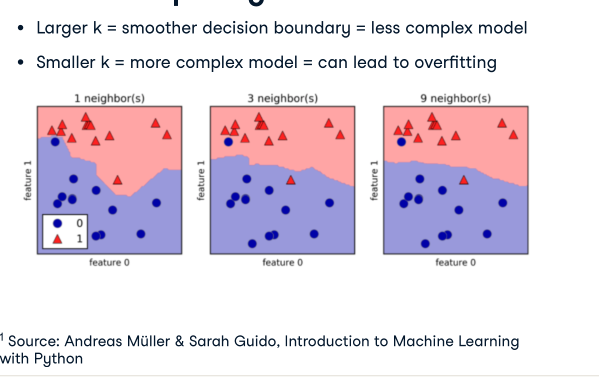

*We consider it to be a less complex model than those with a lower K.*

**Overfitting** Complex models run the risk of being sensitive to noise in the specific data that you have, rather than reflecting general trends in the data. This is know as overfitting.

**Underfitting**
If you increase K even more and make the model even simpler, then the model will perform less well on both test and training sets, as indicated in this schematic figure, known as a model complexity curve.
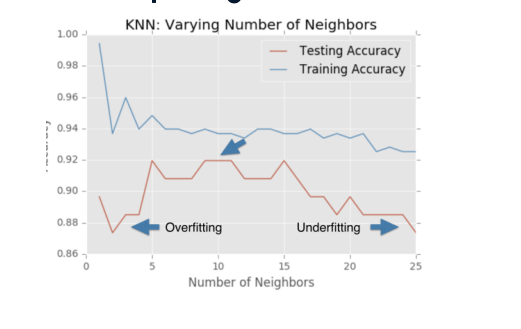

The best performance on the test set is always in the middle.

**The digits recognition**

Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. Recall that scikit-learn's built-in datasets are of type Bunch, which are dictionary-like objects. Helpfully for the MNIST dataset, scikit-learn provides an 'images' key in addition to the 'data' and 'target' keys that you have seen with the Iris data. Because it is a 2D array of the images corresponding to each sample, this 'images' key is useful for visualizing the images, as you'll see in this exercise. On the other hand, the 'data' key contains the feature array - that is, the images as a flattened array of 64 pixels.

Notice that you can access the keys of these Bunch objects in two different ways: By using the . notation, as in digits.images, or the [] notation, as in digits['images'].

* Import datasets from sklearn and matplotlib.pyplot as plt.
* Load the digits dataset using the .load_digits() method on datasets.
* Print the keys and DESCR of digits.
* Print the shape of images and data keys using the . notation.
* Display the 1011th image using plt.imshow(). This has been done for you, so hit 'Submit Answer' to see which handwritten digit this happens to be!

```
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
```

```
dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
    Optical Recognition of Handwritten Digits Data Set
    ===================================================
    
    Notes
    -----
    Data Set Characteristics:
        :Number of Instances: 5620
        :Number of Attributes: 64
        :Attribute Information: 8x8 image of integer pixels in the range 0..16.
        :Missing Attribute Values: None
        :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
        :Date: July; 1998
    
    This is a copy of the test set of the UCI ML hand-written digits datasets
    http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits
    
    The data set contains images of hand-written digits: 10 classes where
    each class refers to a digit.
    
    Preprocessing programs made available by NIST were used to extract
    normalized bitmaps of handwritten digits from a preprinted form. From a
    total of 43 people, 30 contributed to the training set and different 13
    to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
    4x4 and the number of on pixels are counted in each block. This generates
    an input matrix of 8x8 where each element is an integer in the range
    0..16. This reduces dimensionality and gives invariance to small
    distortions.
    
    For info on NIST preprocessing routines, see M. D. Garris, J. L. Blue, G.
    T. Candela, D. L. Dimmick, J. Geist, P. J. Grother, S. A. Janet, and C.
    L. Wilson, NIST Form-Based Handprint Recognition System, NISTIR 5469,
    1994.
    
    References
    ----------
      - C. Kaynak (1995) Methods of Combining Multiple Classifiers and Their
        Applications to Handwritten Digit Recognition, MSc Thesis, Institute of
        Graduate Studies in Science and Engineering, Bogazici University.
      - E. Alpaydin, C. Kaynak (1998) Cascading Classifiers, Kybernetika.
      - Ken Tang and Ponnuthurai N. Suganthan and Xi Yao and A. Kai Qin.
        Linear dimensionalityreduction using relevance weighted LDA. School of
        Electrical and Electronic Engineering Nanyang Technological University.
        2005.
      - Claudio Gentile. A New Approximate Maximal Margin Classification
        Algorithm. NIPS. 2000.
    
    (1797, 8, 8)
    (1797, 64)
```

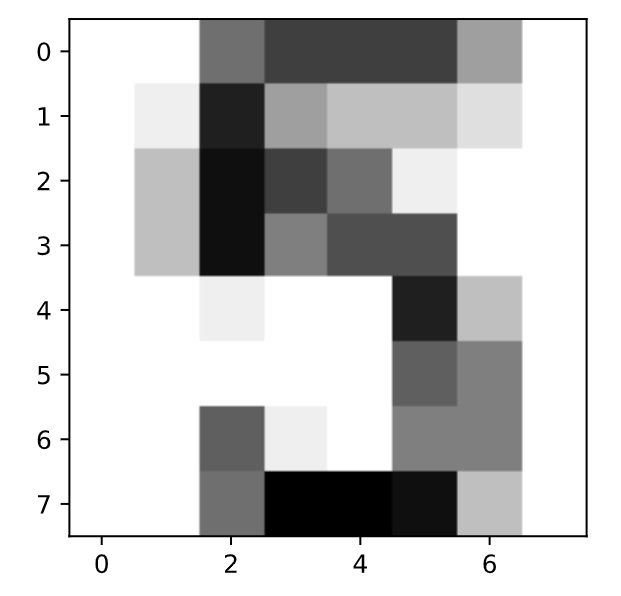


> looks like the image in question corresponds to the digit '5'. Now, can you build a classifier that can make this prediction not only for this image, but for all the other ones in the dataset? 

**Train/Test Split + Fit/Predict/Accuracy**

After creating arrays for the features and target variable, you will split them into training and test sets, fit a k-NN classifier to the training data, and then compute its accuracy using the .score() method.

* Import KNeighborsClassifier from sklearn.neighbors and train_test_split from sklearn.model_selection.
* Create an array for the features using digits.data and an array for the target using digits.target.
* Create stratified training and test sets using 0.2 for the size of the test set. Use a random state of 42. Stratify the split according to the labels so that they are distributed in the training and test sets as they are in the original dataset.
* Create a k-NN classifier with 7 neighbors and fit it to the training data.
* Compute and print the accuracy of the classifier's predictions using the .score() method.

```
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))
```

```
  0.9833333333333333
```
This out of the box k-NN classifier with 7 neighbors has learned from the training data and predicted the labels of the images in the test set with 98% accuracy, and it did so in less than a second! This is one illustration of how incredibly useful machine learning techniques can be.


**Overfitting and underfitting**

You will compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, you will develop your intuition for overfitting and underfitting.

* Inside the for loop:
  * Setup a k-NN classifier with the number of neighbors equal to k.
  * Fit the classifier with k neighbors to the training data.
  * Compute accuracy scores the training set and test set separately using the .score() method and assign the results to the train_accuracy and test_accuracy arrays respectively.

```
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn =  KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

```

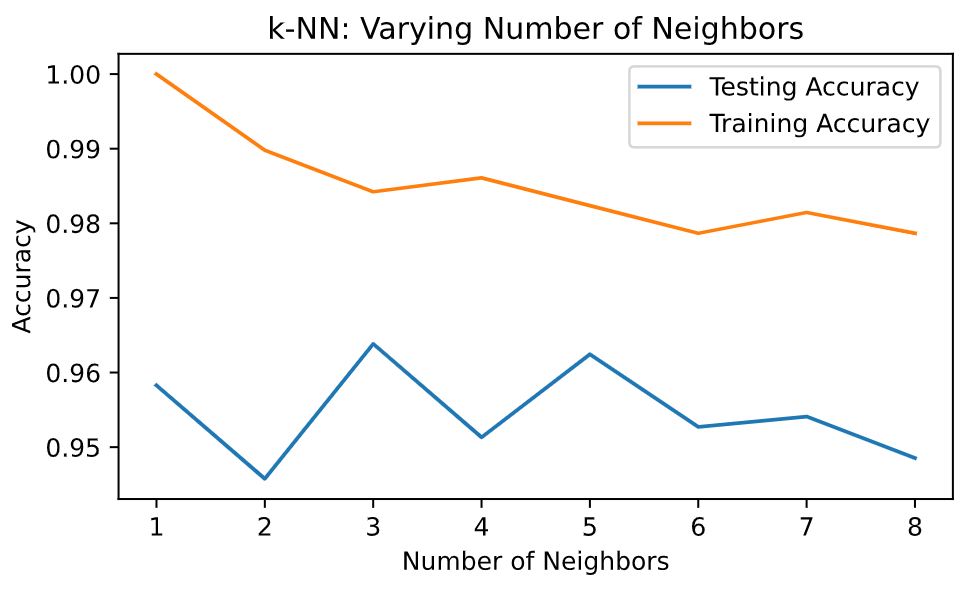



>  It looks like the test accuracy is highest when using 3 and 5 neighbors. Using 8 neighbors or more seems to result in a simple model that underfits the data.

##Regression

###Introduction to regression

1. Checking out the dataset

  *  load it from a comma-separated values file
  ```
  boston = pd.read_csv('boston.csv')
  ```
  * view the head of the data frame using the head method
  ```
  print(boston.head())
  ```

> The documentation tells us the feature 'CRIM' is per capita crime rate, 'NX' is nitric oxides concentration, and 'RM' average number of rooms per dwelling, for example. The target variable, 'MEDV', is the median value of owner occupied homes in thousands of dollars.

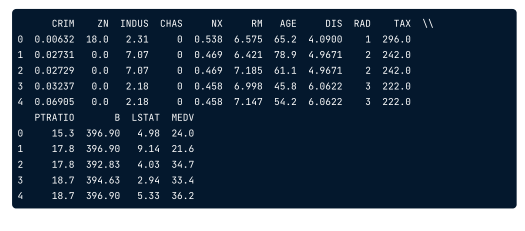```




2. Creating feature and target arrays
  * scikit-learn wants 'features' and target' values in distinct arrays, X and y, we split our DataFrame: 
    * first line here, we drop the target:
    ```
    X = boston.drop('MEDV', axis=1).values
    ```
    * in the second, we keep only the target:
    ```
    y = boston['MEDV'].values
    ```
3. Predicting house value from a single feature
  * Predict the price from a single feature: the average number of rooms in a block:
    * slice out the number of rooms column of the DataFrame X, which is the fifth column into the variable X rooms:
    ```
    X_rooms = X[:,5]
    ```
    * Checking the type of X rooms and y, we see that both are NumPy arrays:
    ```
    type(X_rooms), type(y)
    (numpy.ndarray, numpy.ndarray)
    ```
    * to turn them into NumPy arrays of the desired shape, we apply the reshape method to keep the first dimension, but add another dimension of size one to X:
    ```
    y = y.reshape(-1, 1)
    X_rooms = X_rooms.reshape(-1, 1)
    ```

4. Plotting house value vs. number of rooms

Plot house value as a function of number of rooms using matplotlib's plt dot scatter. We'll also label our axes using x label and y label.
```
plt.scatter(X_rooms, y)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show();
```
>  as one might expect, more rooms lead to higher prices.


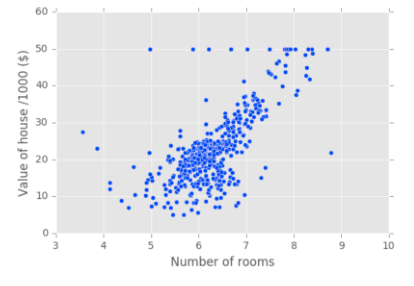



5.  Fitting a regression model

We're going to use a model called linear regression:
  * import numpy as np
  * linear model from sklearn
  * and instantiate LinearRegression as regr
  ```
  import numpy as np
  from sklearn.linear_model import LinearRegression
  reg = LinearRegression()
  ```
  * fit the regression to the data using regr dot fit and passing in the data, the number of rooms, and the target variable, the house price, as we did with the classification problems:
  ```
  reg.fit(X_rooms, y)
  ```
  * check out the regressors predictions over the range of the data. We can achieve that by using ```np.linspace``` between the maximum and minimum number of rooms and make a prediction for this data:
  ```
  prediction_space = np.linspace(min(X_rooms),max(X_rooms)).reshape(-1, 1)
  ```
 * plotting this line with the scatter plot results in the figure you see here:
 ```
 plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space),
color='black', linewidth=3)
plt.show()
```
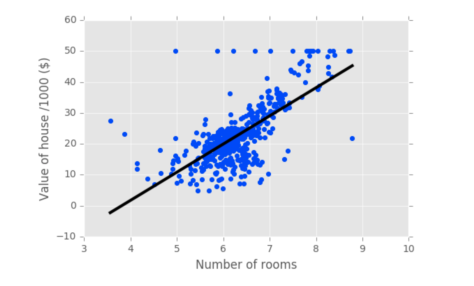

**Importing data for supervised learning**
Use 'gapminder.csv' data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population.

The target variable here is quantitative, this is a regression problem. To begin, you will fit a linear regression with just one feature: 'fertility', which is the average number of children a woman in a given country gives birth to.

* Import numpy and pandas as their standard aliases.
* Read the file 'gapminder.csv' into a DataFrame df using the read_csv() function.
* Create array X for the 'fertility' feature and array y for the 'life' target variable.
* Reshape the arrays by using the .reshape() method and passing in -1 and 1.

```
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df
df = pd.read_csv('gapminder.csv')

# Create arrays for features and target variable
X = df['fertility'].values
y = df['life'].values

# Print the dimensions of y and X before reshaping
print("Dimensions of y before reshaping: ", y.shape)
print("Dimensions of X before reshaping: ", X.shape)

# Reshape X and y
y_reshaped = y.reshape(-1, 1)
X_reshaped = X.reshape(-1, 1)

# Print the dimensions of y_reshaped and X_reshaped
print("Dimensions of y after reshaping: ", y_reshaped.shape)
print("Dimensions of X after reshaping: ", X_reshaped.shape)
```
```
 Dimensions of y before reshaping:  (139,)
  Dimensions of X before reshaping:  (139,)
  Dimensions of y after reshaping:  (139, 1)
  Dimensions of X after reshaping:  (139, 1)
```

> Notice the differences in shape before and after applying the .reshape() method. Getting the feature and target variable arrays into the right format for scikit-learn is an important precursor to model building.

**Exploring the Gapminder data**

Check out this heatmap. Cells that are in green show positive correlation, while cells that are in red show negative correlation.

> Which features are positively correlated with life, and which ones are negatively correlated? Does this match your intuition?

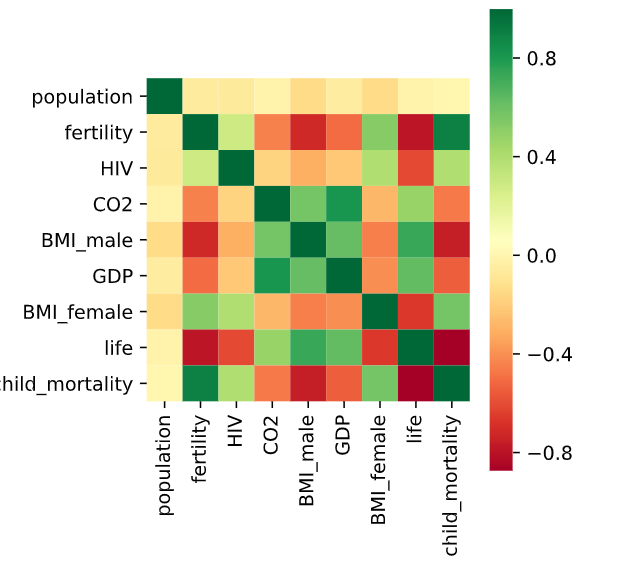

###The basics of linear regression

**how linear regression work?**

We want to fit a line to the data

**and a line in two dimensions is always of the form y = ax + b,**

* y is the target
* x is the single feature
* a and b are the parameters of the model that we want to learn

> So the question of fitting is reduced to: *how do we choose a and b*?

  * *loss or a cost function* - common method is to define an error function for any given line and then to choose the line that minimizes the error function.

**The loss function**

We want the line to be as close to the actual data points as possible.  we wish to minimize the vertical distance between the fit and the data. So for each data point, we calculate the vertical distance between it and the line. This distance is called a residual.

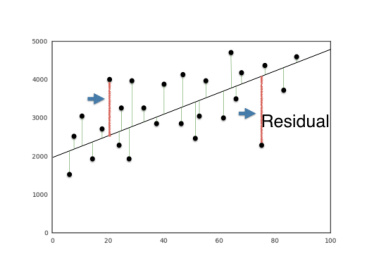

There are couple of large positive and negative residuals here, for that reason  we minimize the sum of the squares of the residuals. This will be our loss function and using this loss function is commonly called **ordinary least squares**, or OLS for short. 

>  this is the same as minimizing the mean squared error of the predictions on the training set

*When you call fit on a linear regression model in scikit-learn, it performs this OLS under the hood.*

**Linear regression in higher dimensions**